# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

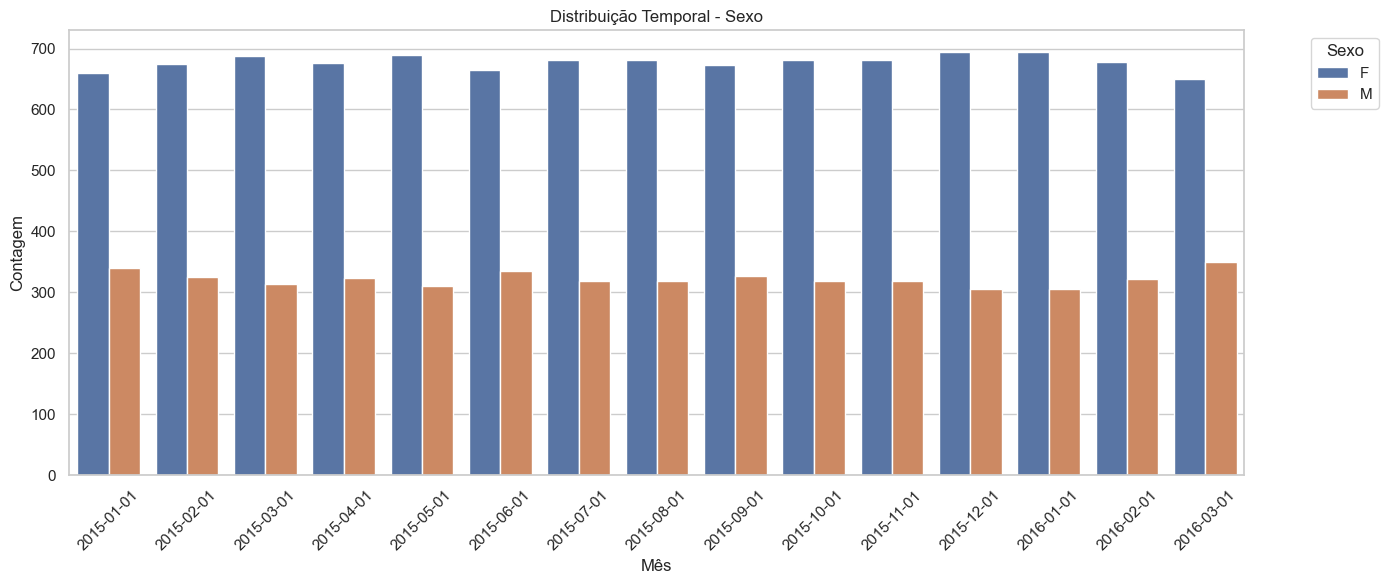

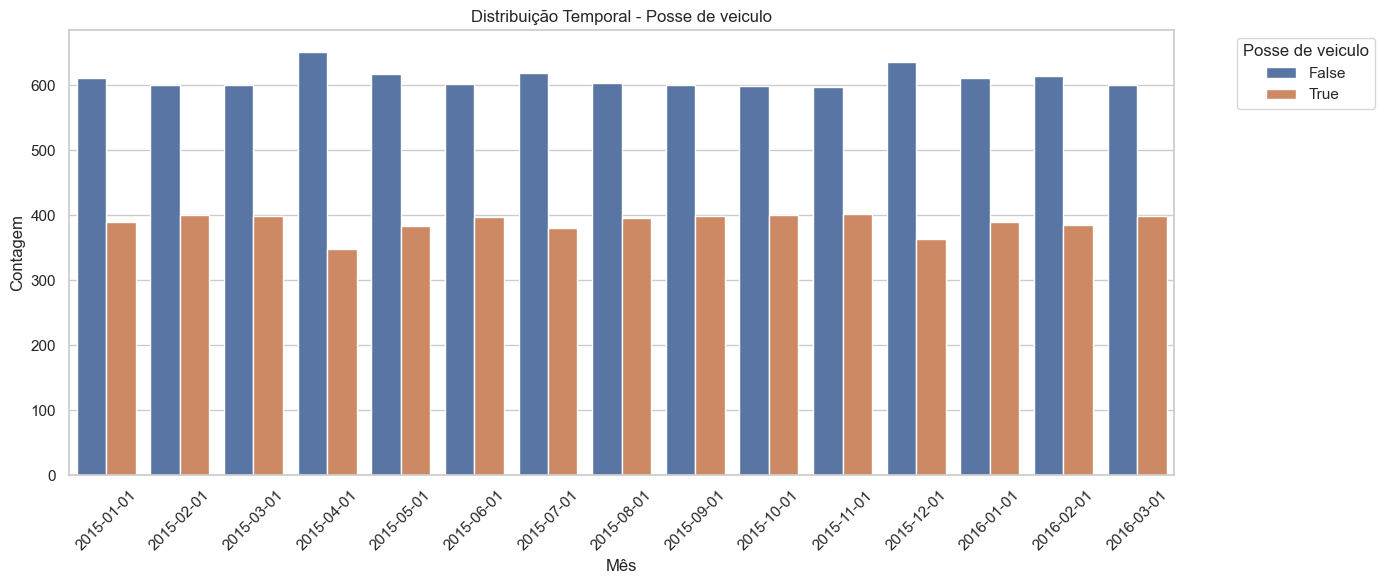

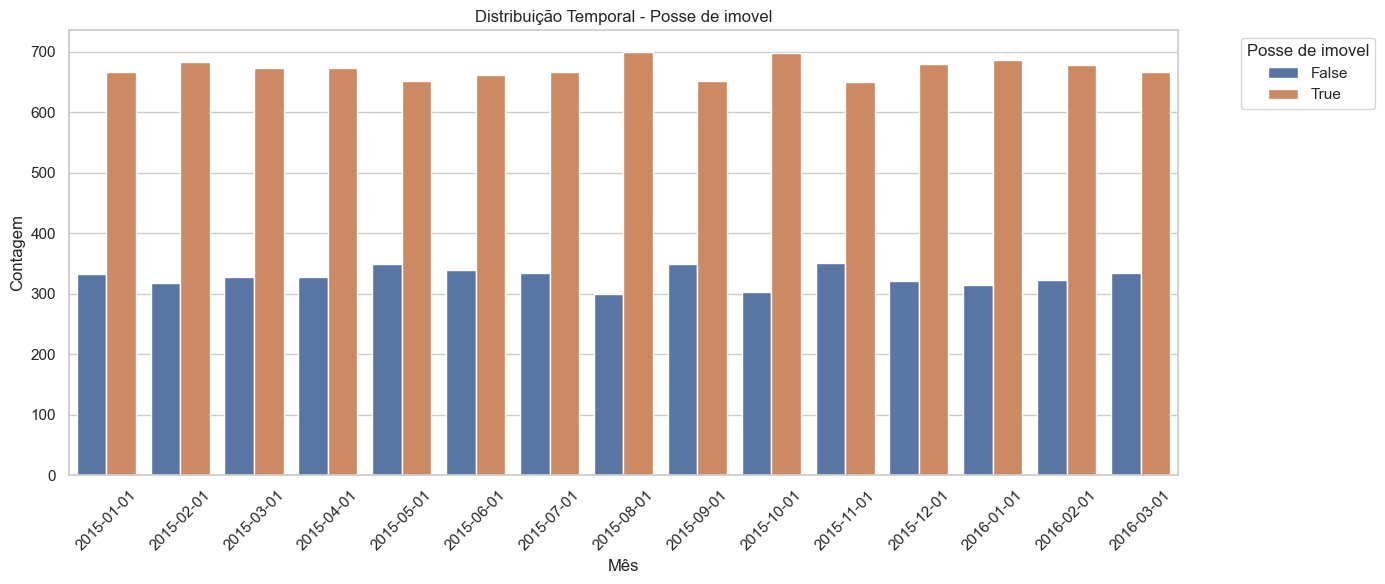

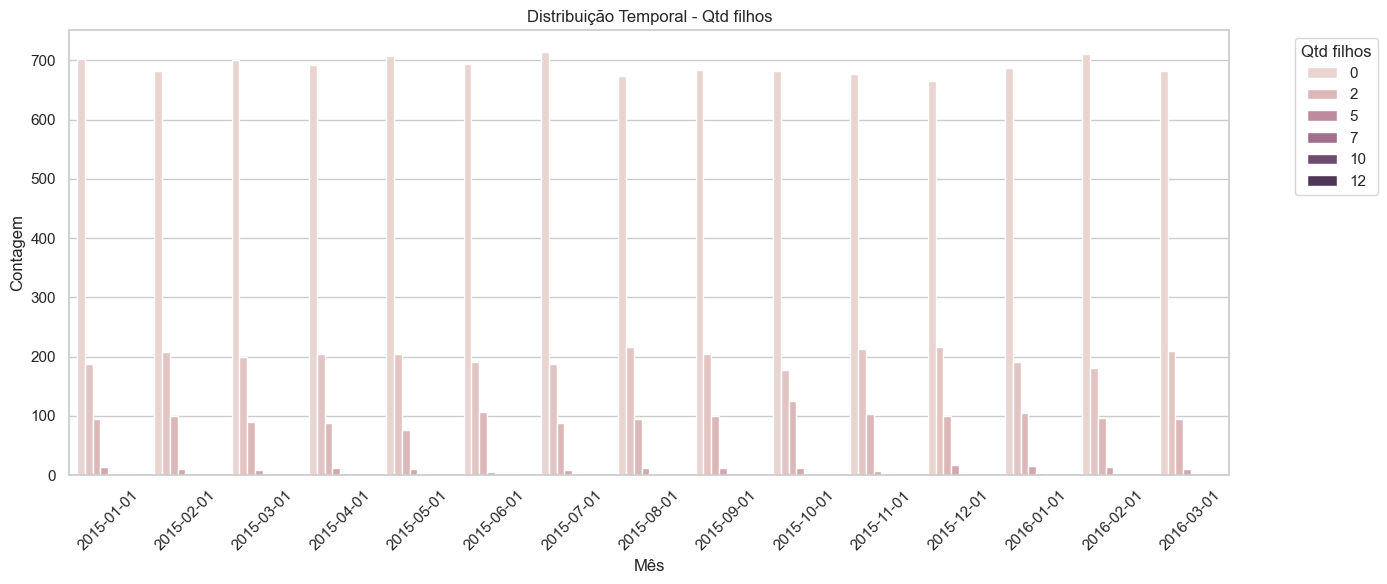

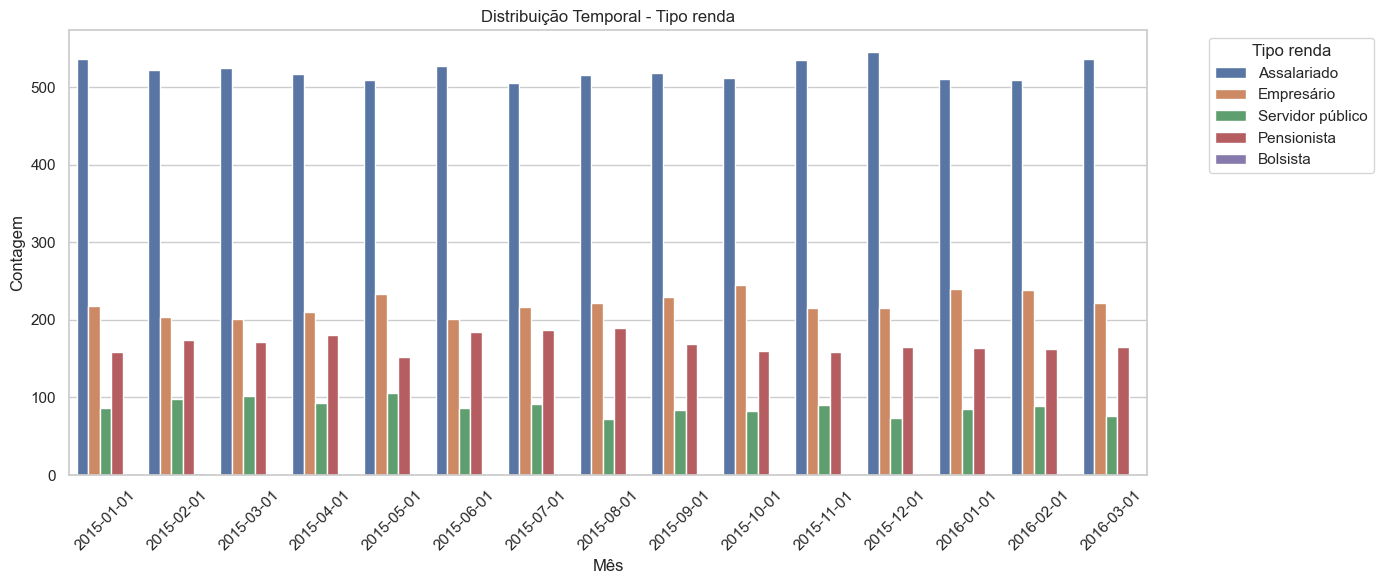

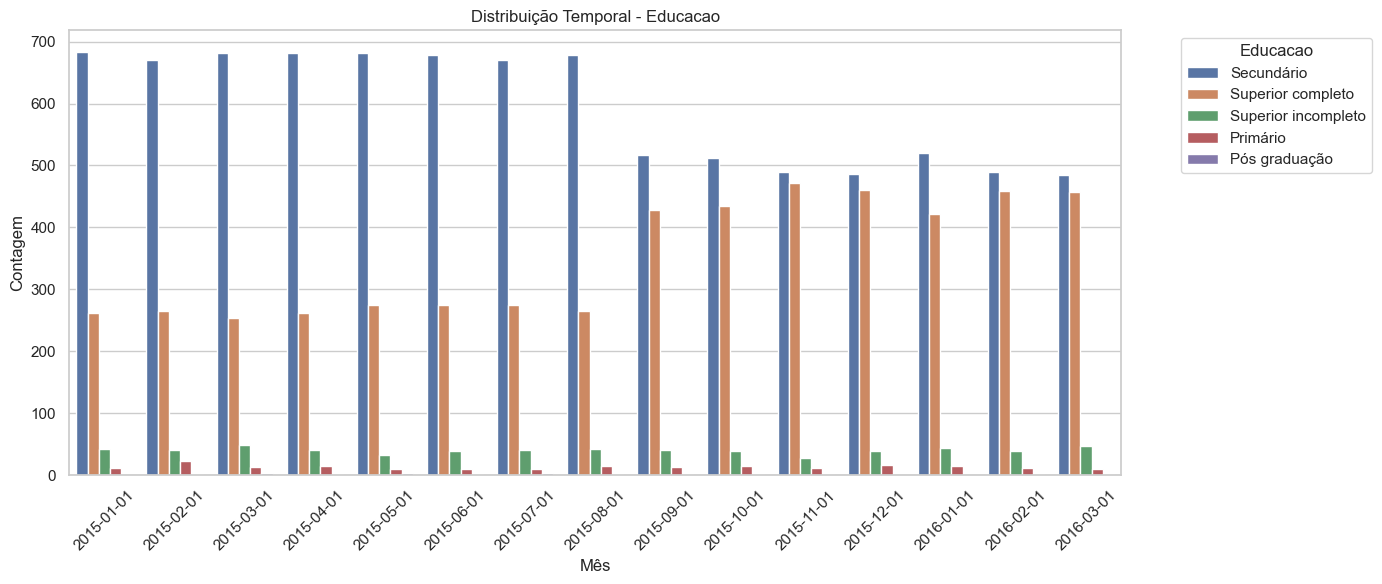

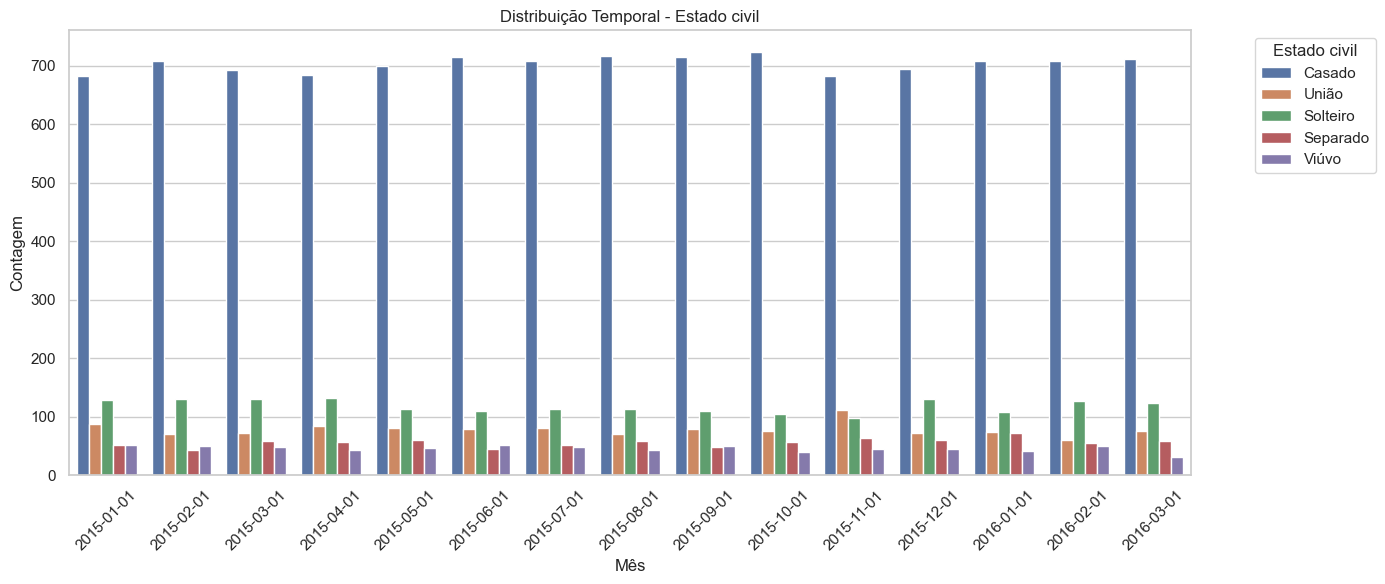

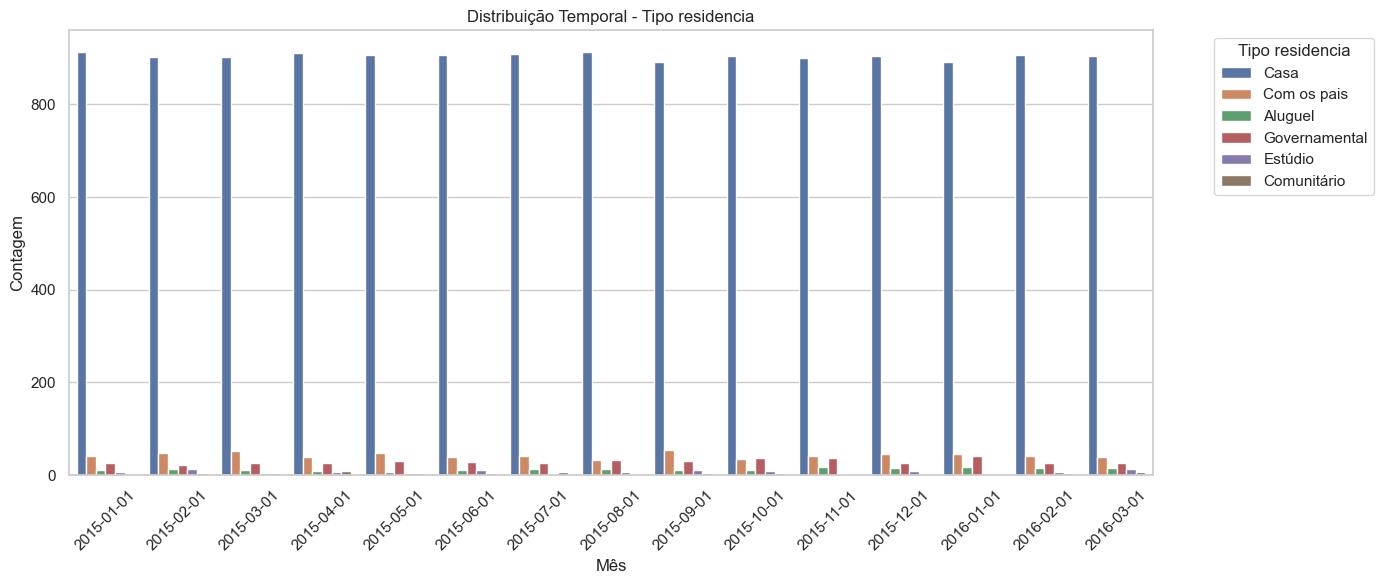

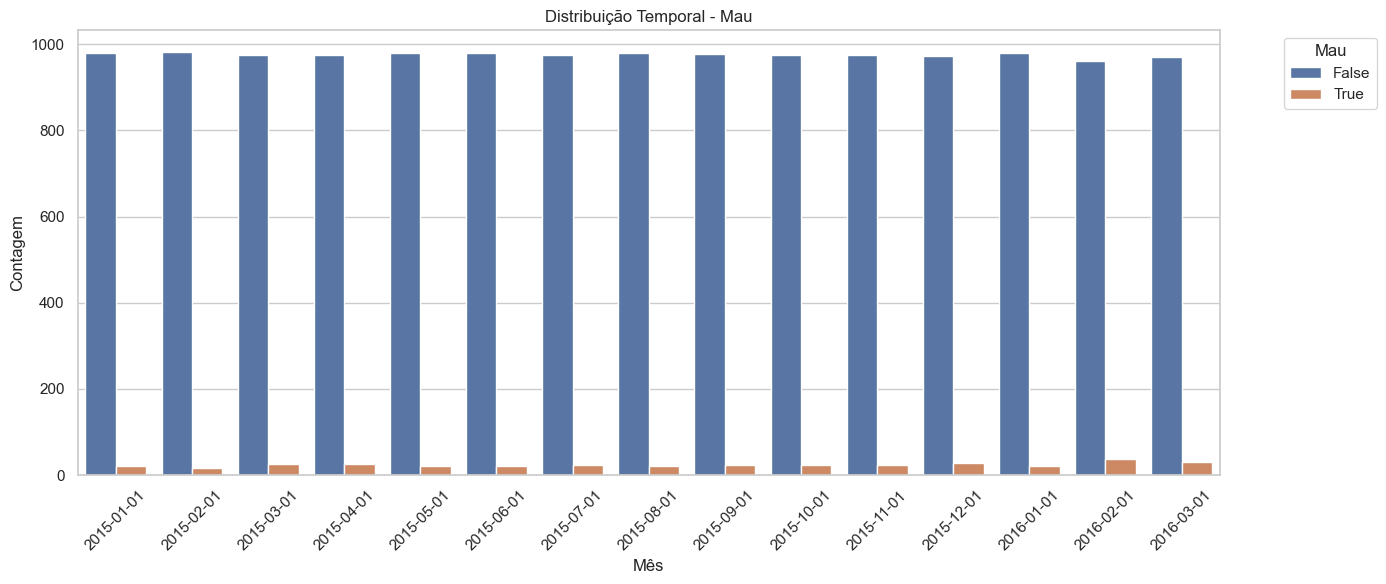

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("previsao_de_renda.csv")

df['data_ref'] = pd.to_datetime(df['data_ref'])
df['mes'] = df['data_ref'].dt.to_period('M').dt.to_timestamp()

variaveis_qualitativas = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
    'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau'
]

for var in variaveis_qualitativas:
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='mes', hue=var)
    plt.title(f'Distribuição Temporal - {var.replace("_", " ").capitalize()}')
    plt.xlabel('Mês')
    plt.ylabel('Contagem')
    plt.legend(title=var.replace("_", " ").capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [2]:
Na verdade acredito que a única variável que apresentou alguma mudança mais expressiva foi no nível de educação, aonde claramente nos últimos anos vem se tendo um menor número de pessoas que pararam de estudar no segundo e completaram nível superior.


Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda', 'mes'],
      dtype='object')


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

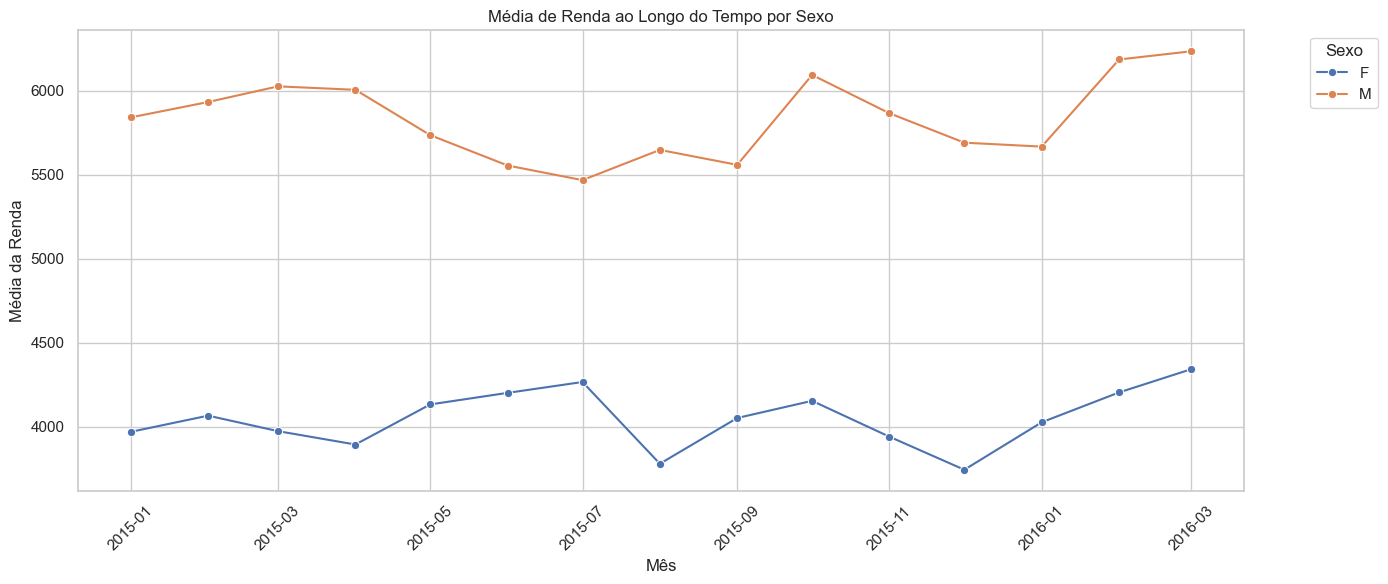

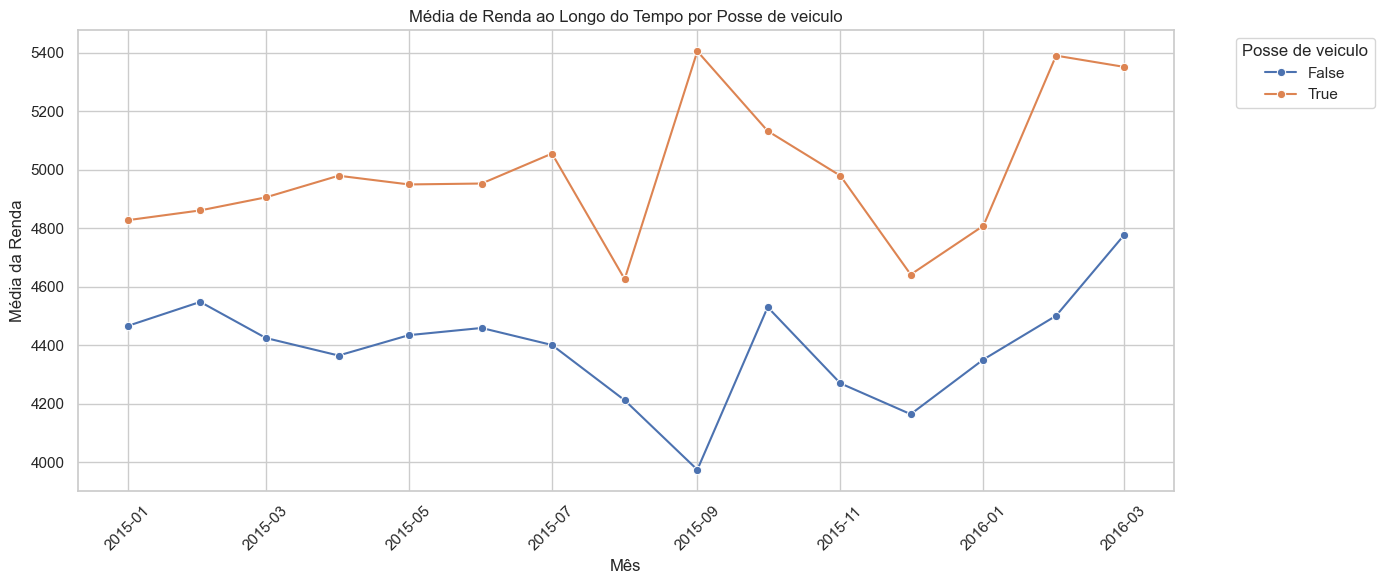

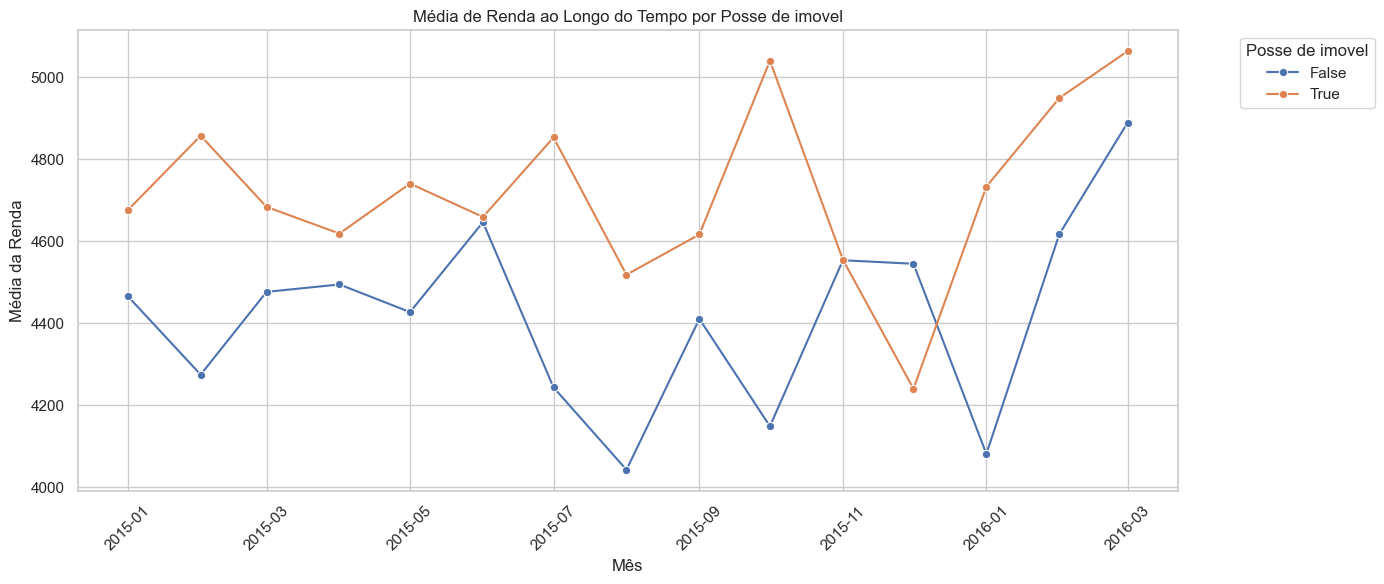

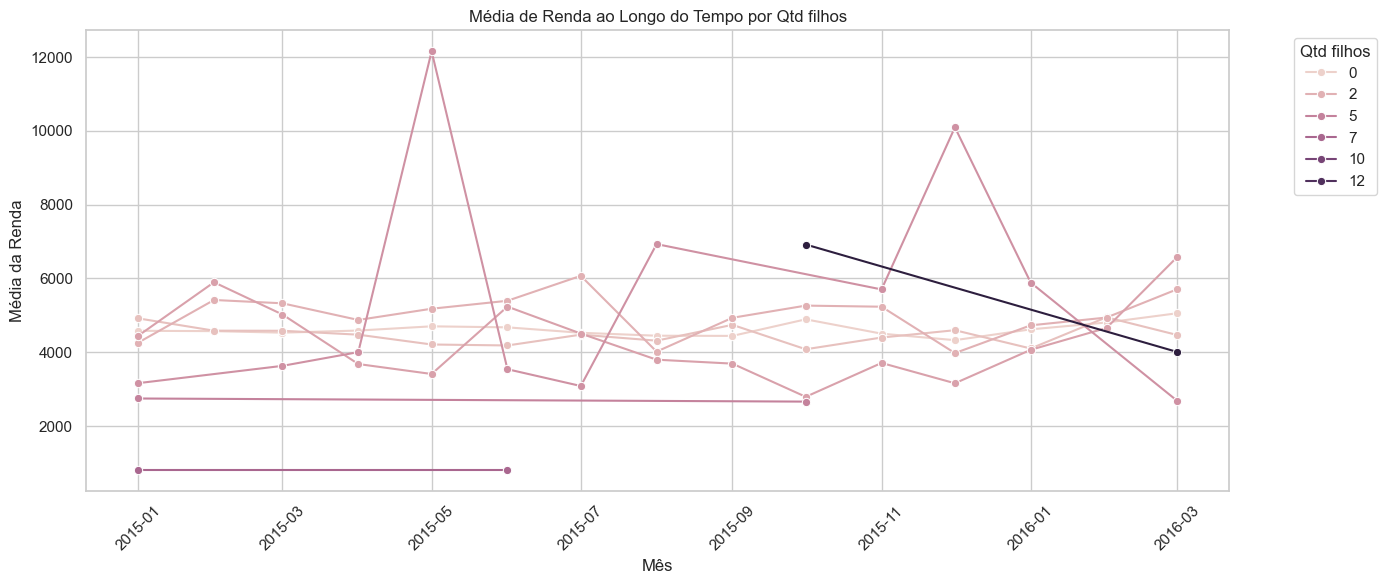

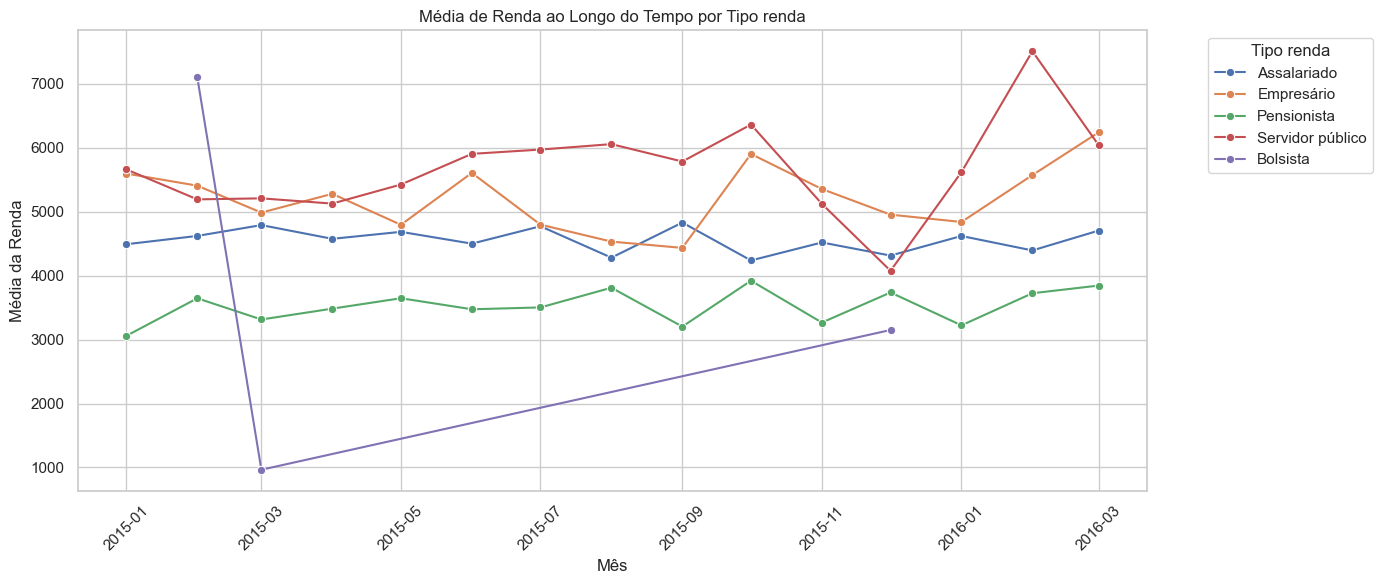

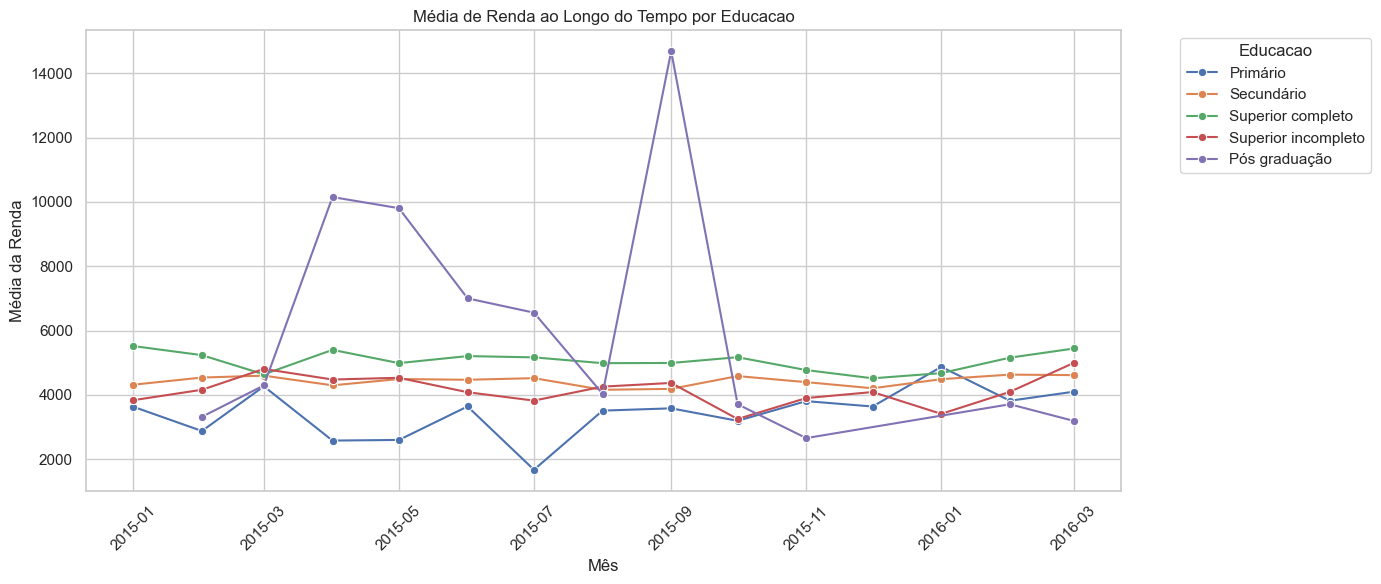

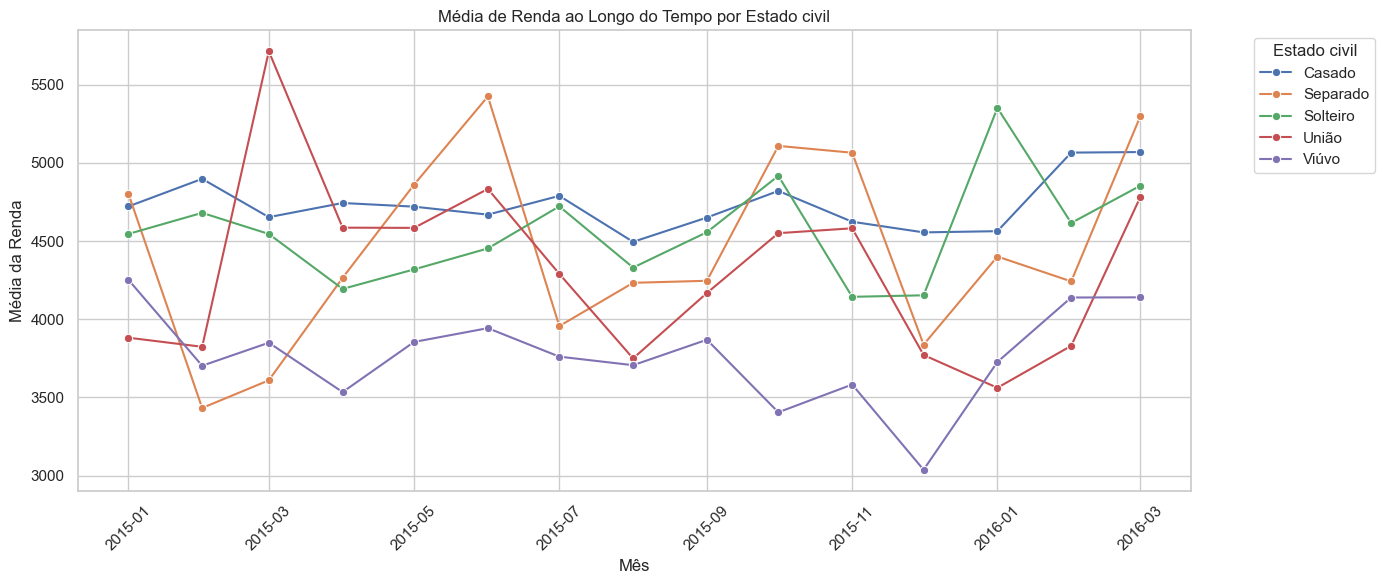

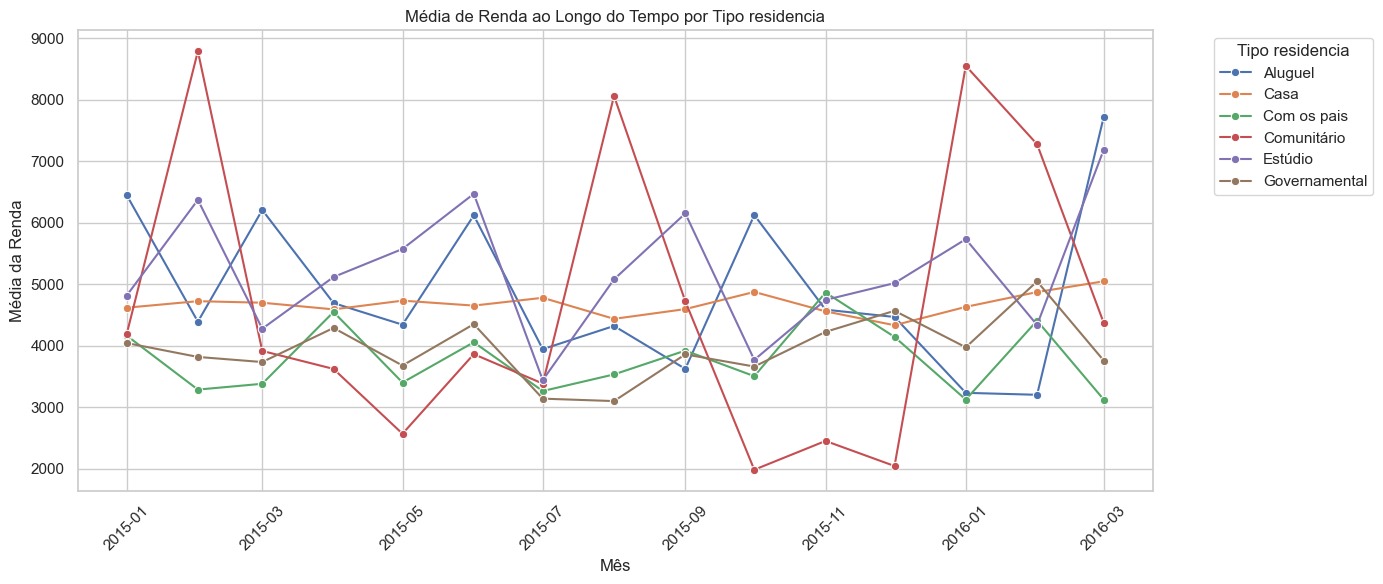

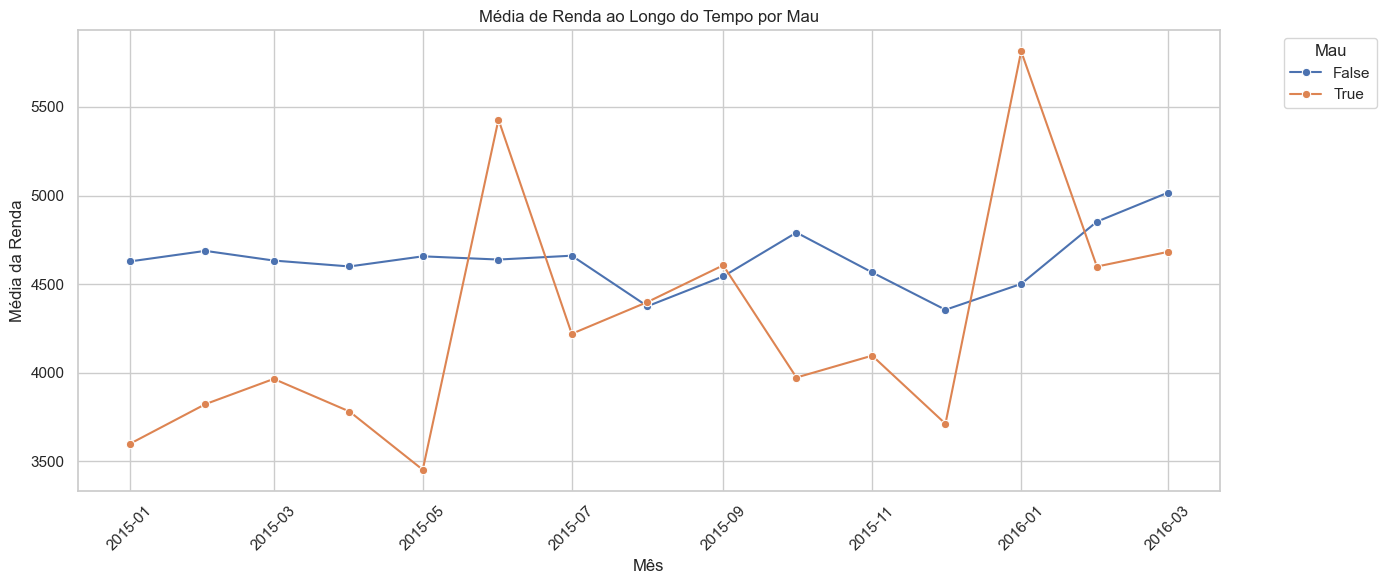

In [4]:
sns.set(style="whitegrid")

df = pd.read_csv("previsao_de_renda.csv")
df['data_ref'] = pd.to_datetime(df['data_ref'])
df['mes'] = df['data_ref'].dt.to_period('M').dt.to_timestamp()

variaveis_qualitativas = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
    'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau'
]

for var in variaveis_qualitativas:
    plt.figure(figsize=(14, 6))
    media_por_mes = df.groupby(['mes', var])['renda'].mean().reset_index()
    sns.lineplot(data=media_por_mes, x='mes', y='renda', hue=var, marker='o')
    plt.title(f'Média de Renda ao Longo do Tempo por {var.replace("_", " ").capitalize()}')
    plt.xlabel('Mês')
    plt.ylabel('Média da Renda')
    plt.xticks(rotation=45)
    plt.legend(title=var.replace("_", " ").capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [ ]:
Em relação ao sexo, vem tendo um aumento da média salarial mas que se mostra de forma estável.
Em realação a posse de veículos parece estar saindo de um ápice da relação veículo x média de renda que parecer estar tendendo a começar um declinío.
Em realçao a média de renda x imóvel não parece ter uma correlação já que tanto a média de renda comparada a ter e não ter imóvel estão aumentando.
Em relação a média de renda x quantidade de filhosm parece que na variação de 5 filhos é muito oscilante o que a torna inutilizavel como parametro de média de renda, as demais se demonstram estáveis mas sem mostrar dados interessantes.
Em relação ao tipo de trabalho o dado que mais oscilou foi os bolsistas que apresentavam uma média de renda alta, que despencou e vem então subindo gradualmente, mas continua sendo a menor média. Já os servidores publicos por mais que tenham tido um período no qual houve uma queda significativa, logo já retomaram a subir e mantem o lugar de segunda maior média, pouco a baixo dos empresários que nos últimos anos tem apresentado um aumento na média salarial que pode ser interessante.
Em relação ao tipo de residência, se mostram muito instáveis, com várias delas oscilando muito entre renda baixa/renda altao que tornaria uma péssima escolha para relacionar a média de renda. Exceto o tipo casa, que mostra estabilidade muito boa com a média de renda.
Em relação a mau pagadores, acredito que seria a melhor variável pois os bons pagadores se mostram estáveis ao longo dos anos em sua faixa de média salarial e temos podemos observar que por mais que tenham nos mals pagadores poderiamos tirar de parametro que a média abaixo de 4.500 é de grande risco pois é aonde se concentra a maior parte das médias de maus pagadores e não temos médias de bons pagadores abaixo dessa média de renda.
Acredito desta forma que exceto por tipo de residência e quantidade de filhos poderia ser usado a modelagem.